In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters



In [10]:
#chemin jérémie
enedis_final = pd.read_csv("/Users/jeremiedarracq/Stat-app/enedis_final.csv",sep=",")

In [12]:
meteo_reg_df=pd.read_csv("/Users/jeremiedarracq/Stat-app/temperature_reg.csv",";")

## I - Régression linéaire simple 
Objectif : Prédiction du Total d'énergie soutirée par journée en fonction de la température de la journée sur une région particulière

Méthode : 
- On somme le total d'énergie soutirée par 1/2h sur une journée en agrégant tout les points de soutirages 
- On l'associe avec la température sur la journée 
- Réalisation d'une régression simple 

### Régression Haut-de-France

In [25]:
## On somme le total d'énergie sur la journée pour l'HDF 
enedis_HDF = enedis_final.loc[enedis_final.region_x == "Hauts-de-France"]
enedis_HDF_new = enedis_HDF.groupby("horodate")["total_energie_soutiree_wh"].sum().reset_index()
enedis_HDF_new["date"]= enedis_HDF_new["horodate"].apply(lambda x : x[0:10])
meteo_reg_df_HDF = meteo_reg_df[meteo_reg_df.region=="Hauts-de-France"]
enedis_HDF_new

,horodate,total_energie_soutiree_wh,date
0,2020-06-04T00:00:00+00:00,9.160308e+08,2020-06-04
1,2020-06-04T00:30:00+00:00,5.441395e+08,2020-06-04
2,2020-06-04T01:00:00+00:00,2.715486e+08,2020-06-04
3,2020-06-04T01:30:00+00:00,3.130624e+08,2020-06-04
4,2020-06-04T02:00:00+00:00,1.903883e+08,2020-06-04
...,...,...,...
20972,2021-08-14T22:00:00+00:00,1.144036e+09,2021-08-14
20973,2021-08-14T22:30:00+00:00,9.698766e+08,2021-08-14
20974,2021-08-14T23:00:00+00:00,9.488306e+08,2021-08-14
20975,2021-08-14T23:30:00+00:00,9.425433e+08,2021-08-14


In [115]:
## On change l'unité de mesure en Méga Watt et on fusionne avec les données de températures
enedis_prev_HDF = enedis_HDF_new.groupby("date")["total_energie_soutiree_wh"].sum().reset_index()
enedis_prev_HDF["total_energie_soutiree_wh"]=enedis_prev_HDF["total_energie_soutiree_wh"]*(10**(-6))
enedis_prev_HDF_cleen = enedis_prev_HDF.merge(meteo_reg_df_HDF,on = "date")
enedis_prev_HDF_cleen

,date,total_energie_soutiree_wh,id,code_insee_region,region,tmin,tmax,tmoy
0,2020-06-04,21847.594510,2020-06-04T00:00:00-32,32,Hauts-de-France,11.54,15.78,13.66
1,2020-06-05,20817.025872,2020-06-05T00:00:00-32,32,Hauts-de-France,10.40,16.08,13.24
2,2020-06-06,25166.758026,2020-06-06T00:00:00-32,32,Hauts-de-France,8.98,15.80,12.39
3,2020-06-07,21494.347189,2020-06-07T00:00:00-32,32,Hauts-de-France,9.66,18.70,14.18
4,2020-06-08,22576.935193,2020-06-08T00:00:00-32,32,Hauts-de-France,9.66,15.82,12.74
...,...,...,...,...,...,...,...,...
432,2021-08-11,41337.412850,2021-08-11T00:00:00-32,32,Hauts-de-France,11.88,23.08,17.48
433,2021-08-12,41560.951592,2021-08-12T00:00:00-32,32,Hauts-de-France,13.42,25.78,19.60
434,2021-08-13,42283.137259,2021-08-13T00:00:00-32,32,Hauts-de-France,13.68,23.24,18.46
435,2021-08-14,43319.561377,2021-08-14T00:00:00-32,32,Hauts-de-France,11.82,25.22,18.52


Pente :  [[-1635.21676496]]
Ordonnée à l'origine :  [53541.34718912]
Racine carrée de l'erreur quadratique moyenne :  39906218.60273409
Sccore R2 :  0.7241690773230539


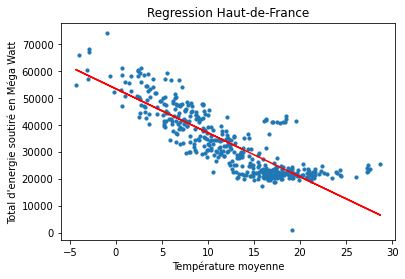

In [126]:
## Modèle de regression 
x = enedis_prev_HDF_cleen[["tmoy"]]
y = enedis_prev_HDF_cleen[["total_energie_soutiree_wh"]]
# initialisation du modèle
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(x, y)
# Prédiction
y_predicted = regression_model.predict(x)
# Évaluation du modèle
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(x, y, s=10)
plt.xlabel('Température moyenne')
plt.ylabel("Total d'energie soutiré en Méga Watt")
plt.title("Regression Haut-de-France")
# Valeurs prédites
plt.plot(x, y_predicted, color='r')
plt.show()

### Régression Occitanie

In [218]:
## On somme le total d'énergie sur la journée pour l'Occitanie
enedis_Occitanie = enedis_final.loc[enedis_final.region_x == "Occitanie"]
enedis_Occitanie_new = enedis_Occitanie.groupby("horodate")["total_energie_soutiree_wh"].sum().reset_index()
enedis_Occitanie_new["date"]= enedis_Occitanie_new["horodate"].apply(lambda x : x[0:10])
meteo_reg_df_Occitanie = meteo_reg_df[meteo_reg_df.region=="Occitanie"]

In [219]:
## On change l'unité de mesure en Méga Watt et on fusionne avec les données de températures
enedis_prev_Occitanie = enedis_Occitanie_new.groupby("date")["total_energie_soutiree_wh"].sum().reset_index()
enedis_prev_Occitanie["total_energie_soutiree_wh"]=enedis_prev_Occitanie["total_energie_soutiree_wh"]*(10**(-6))
enedis_prev_Occitanie_cleen = enedis_prev_Occitanie.merge(meteo_reg_df_Occitanie,on = "date")


Pente :  [[-1886.44280707]]
Ordonnée à l'origine :  [72708.99485089]
Racine carrée de l'erreur quadratique moyenne :  93478188.08200052
Sccore R2 :  0.6264917083980056


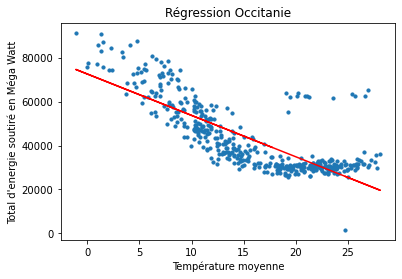

In [220]:
## Modèle de regression 
x = enedis_prev_Occitanie_cleen[["tmoy"]]
y = enedis_prev_Occitanie_cleen[["total_energie_soutiree_wh"]]
# initialisation du modèle
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(x, y)
# Prédiction
y_predicted = regression_model.predict(x)
# Évaluation du modèle
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(x, y, s=10)
plt.xlabel('Température moyenne')
plt.ylabel("Total d'energie soutiré en Méga Watt")
plt.title("Régression Occitanie")
# Valeurs prédites
plt.plot(x, y_predicted, color='r')
plt.show()

### Regression Ile de France 

In [29]:
## On somme le total d'énergie sur la journée pour l'Occitanie
enedis_IDF = enedis_final.loc[enedis_final.region_x == "Île-de-France"]
enedis_IDF_new = enedis_IDF.groupby("horodate")["total_energie_soutiree_wh"].sum().reset_index()
enedis_IDF_new["date"]= enedis_IDF_new["horodate"].apply(lambda x : x[0:10])
meteo_reg_df_IDF= meteo_reg_df[meteo_reg_df.region=="Île-de-France"]

In [30]:
## On change l'unité de mesure en Méga Watt et on fusionne avec les données de températures
enedis_prev_IDF = enedis_IDF_new.groupby("date")["total_energie_soutiree_wh"].sum().reset_index()
enedis_prev_IDF["total_energie_soutiree_MGh"]=enedis_prev_IDF["total_energie_soutiree_wh"]*(10**(-6))
enedis_prev_IDF_cleen = enedis_prev_IDF.merge(meteo_reg_df_IDF,on = "date")

Pente :  [[-2986.88830563]]
Ordonnée à l'origine :  [101969.04755821]
Racine carrée de l'erreur quadratique moyenne :  121118438.69056234
Sccore R2 :  0.7699816327643256


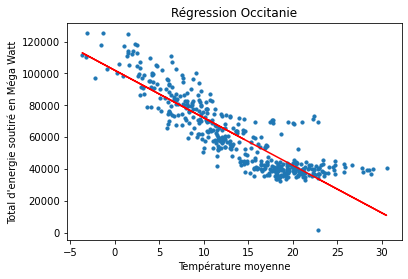

In [132]:
## Modèle de regression 
x = enedis_prev_IDF_cleen[["tmoy"]]
y = enedis_prev_IDF_cleen[["total_energie_soutiree_wh"]]
# initialisation du modèle
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(x, y)
# Prédiction
y_predicted = regression_model.predict(x)
# Évaluation du modèle
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(x, y, s=10)
plt.xlabel('Température moyenne')
plt.ylabel("Total d'energie soutiré en Méga Watt")
plt.title("Régression IDF")
# Valeurs prédites
plt.plot(x, y_predicted, color='r')
plt.show()

## II - Régression linéaire multiple
Objectif : Prédiction du Total d'énergie soutirée par journée en fonction de la température de la journée sur la France entière

Méthode : 
- On somme le total d'énergie soutirée par 1/2h sur une journée en agrégant tout les points de soutirages 
- On l'associe avec la région et la température de la région sur la journée 
- Réalisation d'une régression multiple

## III - Modèle ARIMA 
Objectif : Prédiction du Total d'énergie soutirée par journée en fonction de la température de la journée d'une région particulière en prenant en compte la composante temporelle 

Méthode : 
- On somme le total d'énergie soutirée par 1/2h sur une journée en agrégant tout les points de soutirages 
- On l'associe avec la région et la température de la région sur la journée 

### Modèle ARIMA HDF

==> voir si la série temporelles est stationnairte ou non ?

In [175]:
rolling_mean = enedis_prev_HDF_cleen["total_energie_soutiree_wh"].rolling(window = 12).mean()
rolling_std = enedis_prev_HDF_cleen["total_energie_soutiree_wh"].rolling(window = 12).std()


<function matplotlib.pyplot.show(close=None, block=None)>

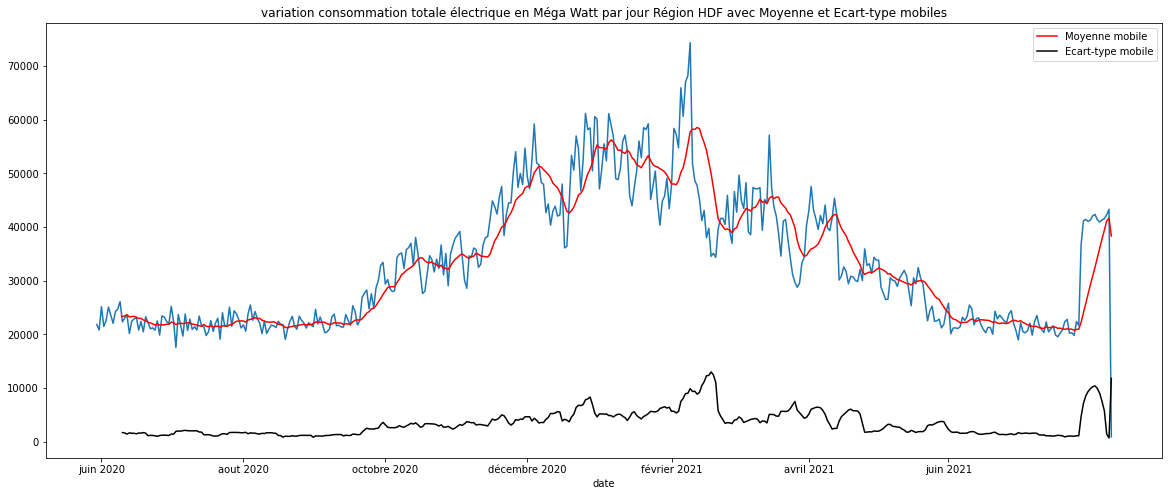

In [176]:
plt.figure(figsize=(20, 8))
plt.plot(enedis_prev_HDF_cleen["date"],enedis_prev_HDF_cleen["total_energie_soutiree_wh"])
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
plt.xlabel('date')
plt.legend(loc = 'best')
plt.title("variation consommation totale électrique en Méga Watt par jour Région HDF avec Moyenne et Ecart-type mobiles")
plt.show

In [177]:
result = adfuller(enedis_prev_HDF_cleen["total_energie_soutiree_wh"])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -1.4072492730647521
p-value : 0.5787958337315628
Valeurs Critiques :
	1%: -3.44594128742536
	5%: -2.868413360220551
	10%: -2.570431271085555


La p-valeur est très élevé (57%) donc la série temporelle n'est pas stationnaire 

In [178]:
## On veut transformer notre série temporelle en série stationnaire 

## Transformation en log
enedis_prev_HDF_cleen["log total energie soutirée_MWh"]= log = np.log(enedis_prev_HDF_cleen["total_energie_soutiree_wh"])

## On soustrait la moyenne mobile

rolling_mean = enedis_prev_HDF_cleen["log total energie soutirée_MWh"].rolling(window=12).mean()
enedis_prev_HDF_cleen["log total energie soutirée_MWh minus_mean"] = enedis_prev_HDF_cleen["log total energie soutirée_MWh"] - rolling_mean


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

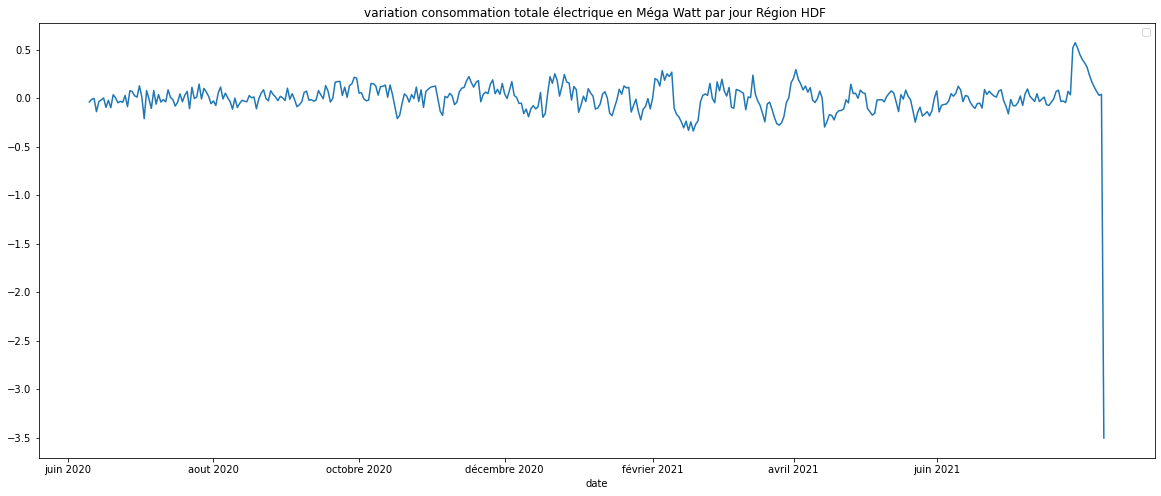

In [179]:
plt.figure(figsize=(20, 8))
plt.plot(enedis_prev_HDF_cleen["date"],enedis_prev_HDF_cleen["log total energie soutirée_MWh minus_mean"])
t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
plt.xlabel('date')
plt.legend(loc = 'best')
plt.title("variation consommation totale électrique en Méga Watt par jour Région HDF ")
plt.show

In [181]:
decomposition = seasonal_decompose(enedis_prev_HDF_cleen["log total energie soutirée_MWh minus_mean"]) 
model = ARIMA(enedis_prev_HDF_cleen["log total energie soutirée_MWh minus_mean"], order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(enedis_prev_HDF_cleen["log total energie soutirée_MWh minus_mean"])
plt.plot(results.fittedvalues, color='red')


ValueError: This function does not handle missing values

### Modèle ARIMA Occitanie 

==> voir si la série temporelle est stationnaire ou pas ? 

In [221]:
enedis_prev_Occitanie_cleen

,date,total_energie_soutiree_wh,id,code_insee_region,region,tmin,tmax,tmoy
0,2020-06-04,27174.698234,2020-06-04T00:00:00-76,76,Occitanie,14.51,20.96,17.74
1,2020-06-05,30381.745683,2020-06-05T00:00:00-76,76,Occitanie,12.94,20.13,16.53
2,2020-06-06,30234.306370,2020-06-06T00:00:00-76,76,Occitanie,13.46,23.17,18.32
3,2020-06-07,31713.883353,2020-06-07T00:00:00-76,76,Occitanie,12.70,19.32,16.01
4,2020-06-08,31297.264508,2020-06-08T00:00:00-76,76,Occitanie,11.35,20.88,16.12
...,...,...,...,...,...,...,...,...
432,2021-08-11,62579.713132,2021-08-11T00:00:00-76,76,Occitanie,18.32,33.07,25.70
433,2021-08-12,62865.233168,2021-08-12T00:00:00-76,76,Occitanie,19.90,33.53,26.71
434,2021-08-13,63812.841587,2021-08-13T00:00:00-76,76,Occitanie,20.10,30.83,25.46
435,2021-08-14,65309.144190,2021-08-14T00:00:00-76,76,Occitanie,19.51,34.35,26.93


In [234]:
reqd_Index = list(np.where(enedis_prev_Occitanie_cleen["date"] == "2021-06-04"))
print(reqd_Index)


[array([364])]


In [241]:
#enedis_Occitanie_ARIMA = enedis_prev_Occitanie_cleen.drop(enedis_prev_Occitanie_cleen.index[364,436], axis=0)
enedis_Occitanie_ARIMA = enedis_prev_Occitanie_cleen.iloc[:401]

In [242]:
rolling_mean = enedis_Occitanie_ARIMA["total_energie_soutiree_wh"].rolling(window = 12).mean()
rolling_std = enedis_Occitanie_ARIMA["total_energie_soutiree_wh"].rolling(window = 12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

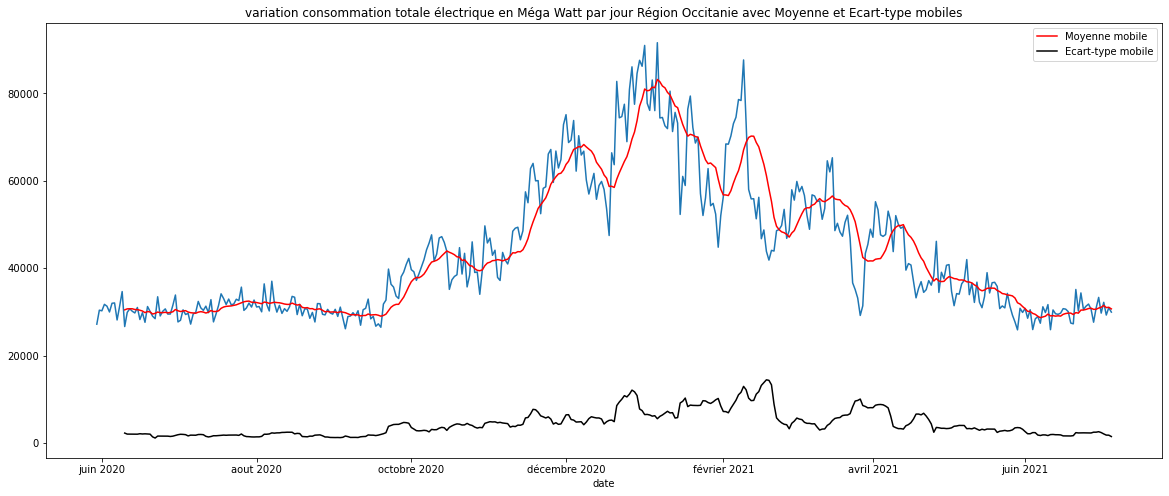

In [243]:
plt.figure(figsize=(20, 8))
plt.plot(enedis_Occitanie_ARIMA["date"],enedis_Occitanie_ARIMA["total_energie_soutiree_wh"])
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
plt.xlabel('date')
plt.legend(loc = 'best')
plt.title("variation consommation totale électrique en Méga Watt par jour Région Occitanie avec Moyenne et Ecart-type mobiles")
plt.show

In [247]:
result = adfuller(enedis_Occitanie_ARIMA["total_energie_soutiree_wh"])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -1.1667863241729468
p-value : 0.6877177871614568
Valeurs Critiques :
	1%: -3.44753973676872
	5%: -2.8691160516676844
	10%: -2.57080585953957


In [248]:
## On veut transformer notre série temporelle en série stationnaire 

## Transformation en log
enedis_Occitanie_ARIMA["log total energie soutirée_MWh"]= log = np.log(enedis_Occitanie_ARIMA["total_energie_soutiree_wh"])

## On soustrait la moyenne mobile

rolling_mean = enedis_Occitanie_ARIMA["log total energie soutirée_MWh"].rolling(window=12).mean()
enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"] = enedis_Occitanie_ARIMA["log total energie soutirée_MWh"] - rolling_mean

<ipython-input-248-e0b8e3d47895>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enedis_Occitanie_ARIMA["log total energie soutirée_MWh"]= log = np.log(enedis_Occitanie_ARIMA["total_energie_soutiree_wh"])
<ipython-input-248-e0b8e3d47895>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"] = enedis_Occitanie_ARIMA["log total energie soutirée_MWh"] - rolling_mean


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

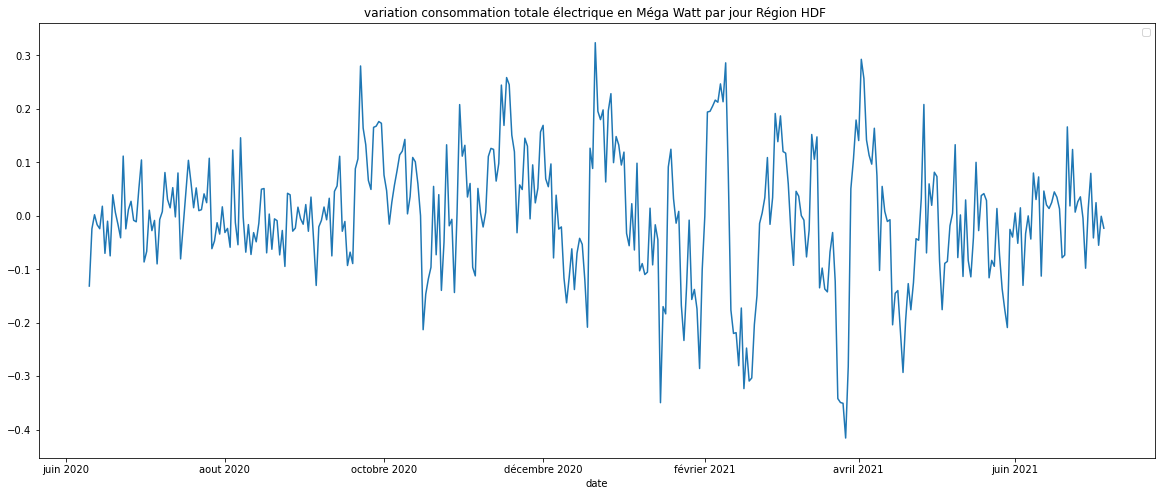

In [249]:
plt.figure(figsize=(20, 8))
plt.plot(enedis_Occitanie_ARIMA["date"],enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"])
t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
plt.xlabel('date')
plt.legend(loc = 'best')
plt.title("variation consommation totale électrique en log Méga Watt par jour Région HDF ")
plt.show

In [256]:
np.isfinite(enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"])
enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"]= enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"].fillna(0)

<ipython-input-256-656053babc60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"]= enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"].fillna(0)


<ipython-input-270-d5252989deb1>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"],model='additive',freq=200, extrapolate_trend = 12)
/Users/jeremiedarracq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmode

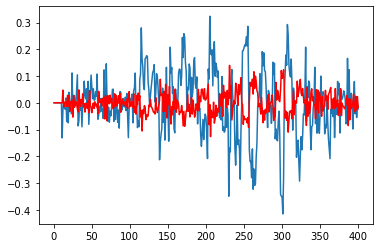

In [270]:
decomposition = seasonal_decompose(enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"],model='additive',freq=200, extrapolate_trend = 12) 
model = ARIMA(enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"], order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"])
plt.plot(results.fittedvalues, color='red')


### Modèle ARIMA IDF (Procédure BOX-JENKINS)

In [271]:
enedis_IDF_ARIMA = enedis_prev_IDF_cleen.iloc[:365]
enedis_IDF_ARIMA

,date,total_energie_soutiree_wh,id,code_insee_region,region,tmin,tmax,tmoy
0,2020-06-04,42925.772026,2020-06-04T00:00:00-11,11,Île-de-France,12.14,16.88,14.51
1,2020-06-05,42549.864524,2020-06-05T00:00:00-11,11,Île-de-France,10.82,17.58,14.20
2,2020-06-06,44403.071099,2020-06-06T00:00:00-11,11,Île-de-France,10.52,18.60,14.56
3,2020-06-07,44842.599933,2020-06-07T00:00:00-11,11,Île-de-France,8.46,19.98,14.22
4,2020-06-08,45033.804056,2020-06-08T00:00:00-11,11,Île-de-France,10.14,18.96,14.55
...,...,...,...,...,...,...,...,...
360,2021-05-31,38796.254398,2021-05-31T00:00:00-11,11,Île-de-France,11.46,23.94,17.70
361,2021-06-01,40069.084909,2021-06-01T00:00:00-11,11,Île-de-France,11.48,27.30,19.39
362,2021-06-02,40086.887233,2021-06-02T00:00:00-11,11,Île-de-France,15.42,26.88,21.15
363,2021-06-03,35252.984780,2021-06-03T00:00:00-11,11,Île-de-France,17.22,27.12,22.17


### Décomposition de la série temporelle
Le principe de la décomposition des séries temporelles est de découper la série originale en plusieurs composants indépendants : tendance, saisonnalité, cycle et bruit.

PASSAGE AU LOG (pour réduire la variance)

<ipython-input-278-cf2b4ec66859>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enedis_IDF_ARIMA["log_total_energie_soutirée_MWh"]= log = np.log(enedis_IDF_ARIMA["total_energie_soutiree_wh"])
No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

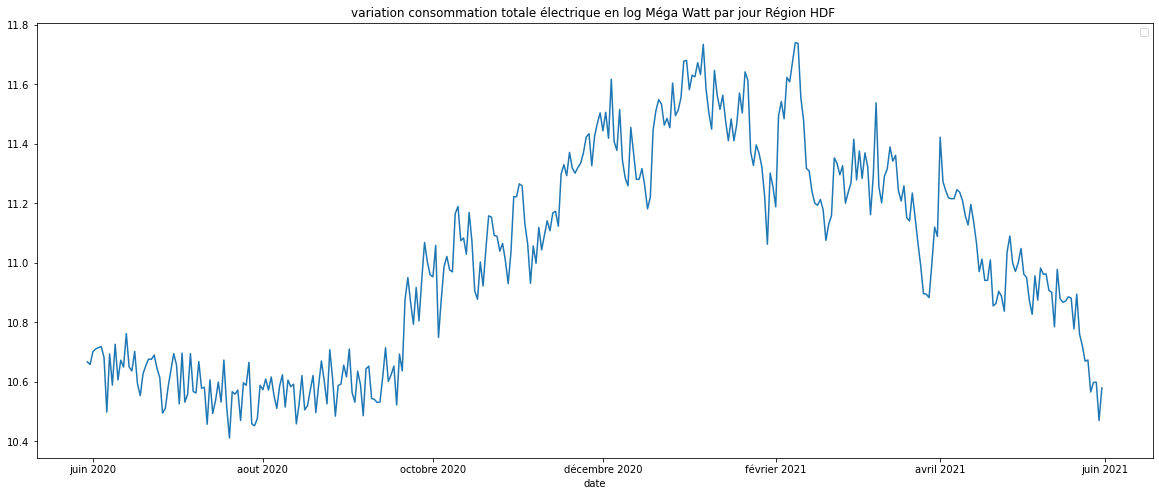

In [278]:
## Transformation en log
enedis_IDF_ARIMA["log_total_energie_soutirée_MWh"]= log = np.log(enedis_IDF_ARIMA["total_energie_soutiree_wh"])
plt.figure(figsize=(20, 8))
plt.plot(enedis_IDF_ARIMA["date"],enedis_IDF_ARIMA["log total energie soutirée_MWh"])
t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
plt.xlabel('date')
plt.legend(loc = 'best')
plt.title("variation consommation totale électrique en log Méga Watt par jour Région HDF ")
plt.show

LA TENDANCE 

<function matplotlib.pyplot.show(close=None, block=None)>

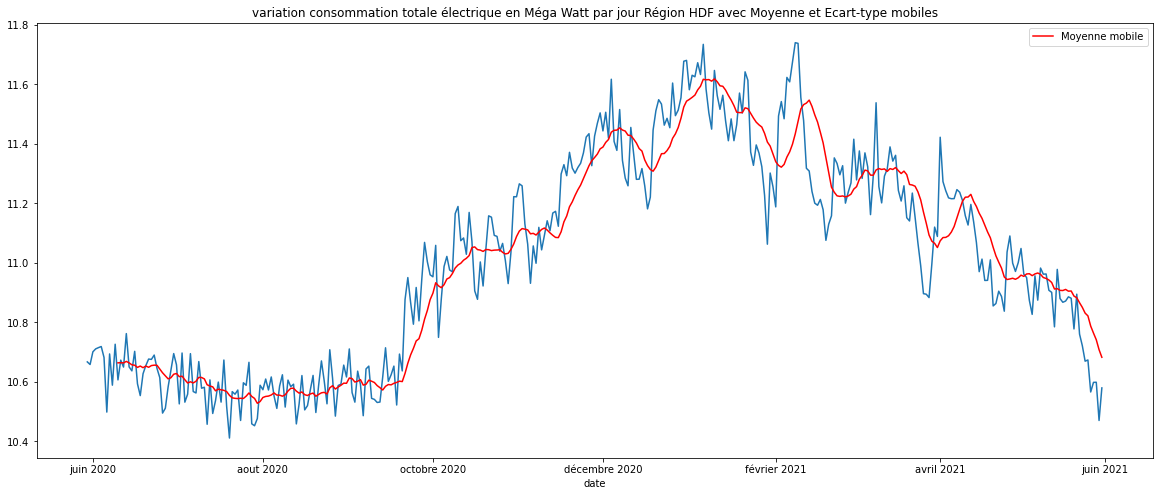

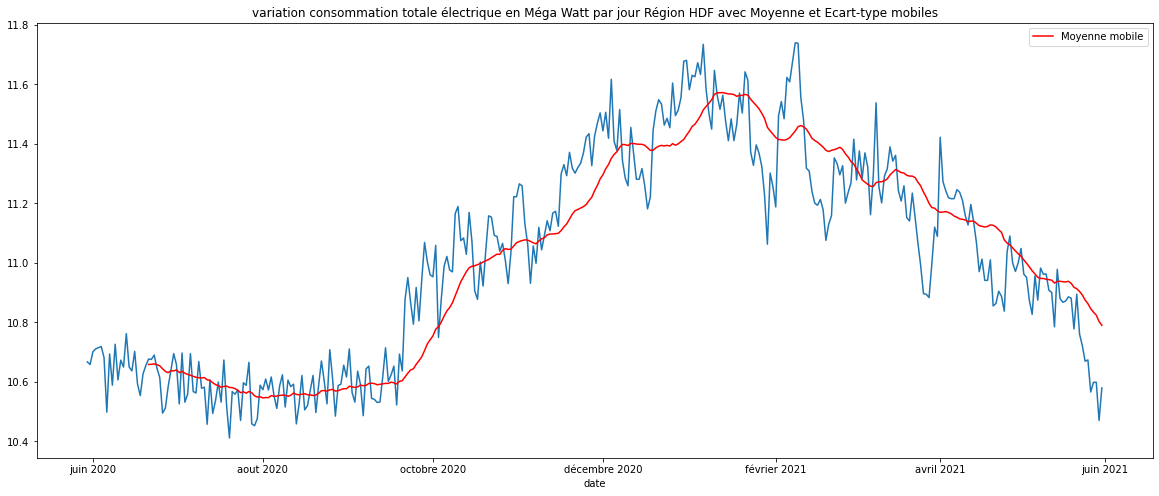

In [282]:
## Montre que la série temporelle n'est pas stationnaire 
rolling_mean = enedis_IDF_ARIMA["log total energie soutirée_MWh"].rolling(window = 12).mean()

plt.figure(figsize=(20, 8))
plt.plot(enedis_IDF_ARIMA["date"],enedis_IDF_ARIMA["log total energie soutirée_MWh"])
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
plt.xlabel('date')
plt.legend(loc = 'best')
plt.title("variation consommation totale électrique en Méga Watt par jour Région HDF avec Moyenne et Ecart-type mobiles")
plt.show


LE BRUIT 

<ipython-input-287-951e57d43683>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"],model='additive',freq=10,extrapolate_trend=12)


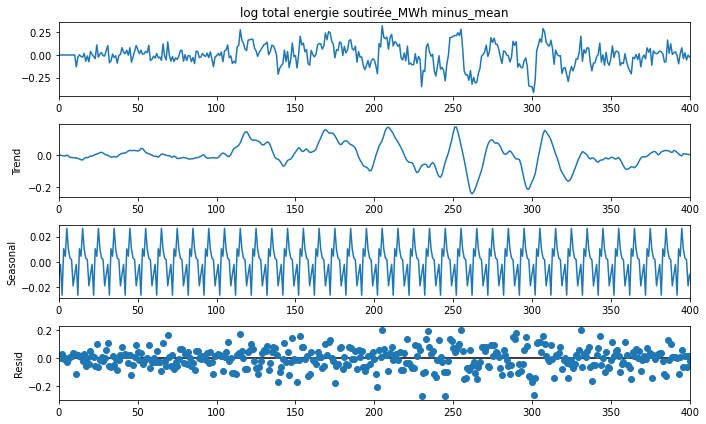

In [287]:
decomposition = seasonal_decompose(enedis_Occitanie_ARIMA["log total energie soutirée_MWh minus_mean"],model='additive',freq=10,extrapolate_trend=12) 

fig = decomposition.plot()
fig.set_size_inches((10, 6))
fig.tight_layout()
plt.show()

## MODÈLE DEEPAR 

In [4]:
! pip install gluonts
! pip install "gluonts[torch,pro]"

     |████████████████████████████████| 980 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 825 kB 46.9 MB/s eta 0:00:01
     |████████████████████████████████| 135.4 MB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 143 kB 34.5 MB/s eta 0:00:01
     |████████████████████████████████| 192 kB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 517 kB 31.2 MB/s eta 0:00:01
     |████████████████████████████████| 359 kB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 13.5 MB/s eta 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.8.3
    Uninstalling fsspec-0.8.3:
      Successfully uninstalled fsspec-0.8.3
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.3.1
ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [5]:
import numpy as np 
import pandas as pd
import os


In [14]:
## Transformation base de donnée 
enedis_IDF_new
enedis_IDF_deep = enedis_IDF_new.merge(meteo_reg_df_HDF,on = "date")

,horodate,total_energie_soutiree_wh,date
0,2020-06-04T00:00:00+00:00,1.492534e+09,2020-06-04
1,2020-06-04T00:30:00+00:00,8.542445e+08,2020-06-04
2,2020-06-04T01:00:00+00:00,7.844512e+08,2020-06-04
3,2020-06-04T01:30:00+00:00,4.455620e+08,2020-06-04
4,2020-06-04T02:00:00+00:00,5.642244e+08,2020-06-04
...,...,...,...
20972,2021-08-14T22:00:00+00:00,1.704726e+09,2021-08-14
20973,2021-08-14T22:30:00+00:00,1.477649e+09,2021-08-14
20974,2021-08-14T23:00:00+00:00,1.429661e+09,2021-08-14
20975,2021-08-14T23:30:00+00:00,1.401945e+09,2021-08-14


In [15]:
reqd_Index = list(np.where(enedis_IDF_new["horodate"] == "2021-01-04T00:00:00+00:00"))
print(reqd_Index)

[array([10272])]


In [35]:
enedis_prev_IDF_cleen
enedis_IDF_deepAR = enedis_prev_IDF_cleen.drop(columns = ["region","code_insee_region","tmax","tmin","total_energie_soutiree_wh","id"])
enedis_IDF_deepAR

,date,total_energie_soutiree_MGh,tmoy
0,2020-06-04,42925.772026,14.51
1,2020-06-05,42549.864524,14.20
2,2020-06-06,44403.071099,14.56
3,2020-06-07,44842.599933,14.22
4,2020-06-08,45033.804056,14.55
...,...,...,...
432,2021-08-11,69276.112437,21.02
433,2021-08-12,69748.122532,22.85
434,2021-08-13,71107.947594,22.28
435,2021-08-14,72920.041712,22.34


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.mx import DeepAREstimator, Trainer

### Préparation des données

In [20]:
freq="30Min" ## rate at  which dataset is sampled
start_train = pd.Timestamp("2020-06-04T00:00:00+00:00", freq=freq) ## start index
start_test = pd.Timestamp("2021-01-04T00:00:00+00:00", freq=freq) ## start_index for test_set verify by df_all.columns[40000:].shape == df_test.shape

prediction_lentgh= 24 * 1 ## Our prediction Length is 1 Days 

In [21]:
df_train=enedis_IDF_new.iloc[:,1:10272].values
df_test=enedis_IDF_new.iloc[:,20977:].values

In [24]:
df_train.shape

(20977, 2)